Enter Object Id: 40
LR: 0.857196 (0.039032)
LDA: 0.292392 (0.039668)
KNN: 0.743975 (0.051606)
CART: 0.857294 (0.023187)
NB: 0.893447 (0.027121)
SVM: 0.842226 (0.031296)


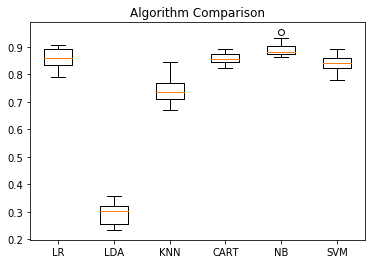

Gaussian Naive Bayes model accuracy(in %): 80.0
Predicted=Groundnut_S1
Number of mislabeled points out of a total 40 points : 8


In [7]:
import numpy as np
import pandas as pd 
crop_data=pd.read_csv('croprequirements_ready_to_encode.csv')
crop_data=crop_data.fillna(0)
crop_datanew=crop_data['Crop_suitability'].to_frame()

cleaned = crop_data.Texture.str.split(',', expand=True).stack()
a=pd.get_dummies(cleaned,prefix='Texture').groupby(level=0).sum()
crop_datanew=crop_datanew.join(a)

cleaned = crop_data.Slope.str.split(',', expand=True).stack()
a=pd.get_dummies(cleaned,prefix='Slope').groupby(level=0).sum()
crop_datanew=crop_datanew.join(a)

cleaned = crop_data.Erosion.str.split(',', expand=True).stack()
a=pd.get_dummies(cleaned,prefix='Erosion').groupby(level=0).sum()
crop_datanew=crop_datanew.join(a)

cleaned = crop_data.Gravel.str.split(',', expand=True).stack()
a=pd.get_dummies(cleaned,prefix='Gravel').groupby(level=0).sum()
crop_datanew=crop_datanew.join(a)

cleaned = crop_data.Rocky.str.split(',', expand=True).stack()
a=pd.get_dummies(cleaned,prefix='Rocky').groupby(level=0).sum()
crop_datanew=crop_datanew.join(a)

cleaned = crop_data.Drainage.str.split(',', expand=True).stack()
a=pd.get_dummies(cleaned,prefix='Drainage').groupby(level=0).sum()
crop_datanew=crop_datanew.join(a)

cleaned = crop_data.Depth.str.split(',', expand=True).stack()
a=pd.get_dummies(cleaned,prefix='Depth').groupby(level=0).sum()
crop_datanew=crop_datanew.join(a)

crop_datanew=crop_datanew.fillna(0)

obj_id=int(input("Enter Object Id: "))

hadon_data=pd.read_csv("Hadonahalli.csv",index_col="Slno")

h=hadon_data[hadon_data['Object_id'] == obj_id]

to_find_arr=[]
texture_arr=['c','cl','l','ls','s','sc','scl','sic','sicl','sil','sl']
slope_depth_arr=['A','B','C','D','E']
Ero_gra_roc_drainage_arr=['A','B','C']

tex=str(list(h['Texture'])[0])
#tex=str(tex[0])
for i in texture_arr:
    if i==tex:
        to_find_arr.append(1)
    else:
        to_find_arr.append(0)
        

slope=str(list(h['Slope_code'])[0])
#slope=str(slope[0])
for i in slope_depth_arr:
    if i==slope:
        to_find_arr.append(1)
    else:
        to_find_arr.append(0)
        

erosion=str(list(h['Erosion_code'])[0])
#erosion=str(erosion[0])
for i in Ero_gra_roc_drainage_arr:
    if i==erosion:
        to_find_arr.append(1)
    else:
        to_find_arr.append(0)
        
gravel=str(list(h['Gravel_code'])[0])
#gravel=str(gravel[0])
for i in Ero_gra_roc_drainage_arr:
    if i==gravel:
        to_find_arr.append(1)
    else:
        to_find_arr.append(0)
        
rocky=str(list(h['Rocky_code'])[0])
#rocky=str(rocky[0])
for i in Ero_gra_roc_drainage_arr:
    if i==rocky:
        to_find_arr.append(1)
    else:
        to_find_arr.append(0)

drainage=str(list(h['Drainage_code'])[0])
#drainage=str(drainage[0])
for i in Ero_gra_roc_drainage_arr:
    if i==drainage:
        to_find_arr.append(1)
    else:
        to_find_arr.append(0)
        
depth=str(list(h['Depth_code'])[0])
#depth=str(depth[0])
for i in slope_depth_arr:
    if i==depth:
        to_find_arr.append(1)
    else:
        to_find_arr.append(0)
to_find_arr.append(1)
to_find_arr.append(1)
to_find_arr.append(1)

temp=int(list(h['Temperature'])[0])
rain=int(list(h['Rainfall in mm'])[0])
pH=float(list(h['pH'])[0])

crop_datanew['Temperature']=0
for n,i in enumerate(crop_data["Temperature"]):
    l=i.split(',')
    temp_arr=[]
    for m in l:
        x=m.split('-')
        for _ in range(int(x[0]),int(x[1])+1):
            temp_arr.append(_)
    if temp in temp_arr:
        #print("True")
        crop_datanew['Temperature'][n]=1
    else:
        #print("False")
        crop_datanew['Temperature'][n]=0
        
crop_datanew['Rainfall']=0
for n,i in enumerate(crop_data['Rainfall']):
    l=i.split(',')
    temp_arr=[]
    for m in l:
        x=m.split('-')
        for _ in range(int(x[0]),int(x[1])+1):
            temp_arr.append(_)
    if rain in temp_arr:
        #print("True")
        crop_datanew['Rainfall'][n]=1
    else:
        #print("False")
        crop_datanew['Rainfall'][n]=0
    

crop_datanew['pH']=0
for n,i in enumerate(crop_data['pH']):
    l=i.split(',')
    temp_arr=[]
    for m in l:
        x=m.split('-')
        for _ in np.arange(float(x[0]),float(x[1])+0.1,0.1):
            temp_arr.append(round(_,1))
    if pH in temp_arr:
        #print("True")
        crop_datanew['pH'][n]=1
    else:
        #print("False")
        crop_datanew['pH'][n]=0
        
crop_datanew.to_csv('croprequirements_encoded.csv')

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Split-out validation dataset
array = crop_datanew.values
X = array[:,1:]
y = array[:,0]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Spot Check Algorithms
import warnings
warnings.filterwarnings('ignore')

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = crop_datanew.iloc[:,1:]  #independent columns
y = crop_datanew.iloc[:,0]    #target column 


from sklearn.naive_bayes import GaussianNB 
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.05, random_state=1)
gnb = GaussianNB() 
gnb.fit(X_train, Y_train) 

y_pred = gnb.predict(X_validation)

from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_validation, y_pred)*100)

ypred = gnb.predict([to_find_arr])
print("Predicted=%s" % (ypred[0]))

y_pred = gnb.fit(X_train, Y_train).predict(X_validation)
print("Number of mislabeled points out of a total %d points : %d" % (X_validation.shape[0], (Y_validation != y_pred).sum()))